# Redes neuronales en un problema de clasificación

En este notebook vamos a estudiar cómo utilizar una red neuronal de tipo perceptrón multicapa en un problema de clasificación.

In [ ]:
RANDOM_STATE=333

## Conjunto de datos

Usaremos un conjunto de datos sobre cáncer de mama en el que se usan 30 variables, extraídas a partir de imágenes, para tratar de predecir si la paciente tiene o no la enfermedad.

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

print('Names of the features:', breast['feature_names'])
print('Names of classes:', breast['target_names'])
print('Number of instances and features:', breast['data'].shape)

Names of the features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Names of classes: ['malignant' 'benign']
Number of instances and features: (569, 30)


In [ ]:
import pandas as pd

# Crear la tabla y añadir una columna con la clase que se trata de predecir
df = pd.DataFrame(data=breast['data'], columns=breast['feature_names']) 
df['target'] = breast['target']

df.head() # Sólo mostramos las primeras filas


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Número de ejemplos en cada clase
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
# Frecuencia de las clases
df['target'].value_counts() / df['target'].count() * 100

1    62.741652
0    37.258348
Name: target, dtype: float64

## Reescalado de los datos

Las variables de este conjunto de datos son numéricas pero de una escala muy diferente por lo que para usar determinadas técnicas (como las basadas en distancia, como el k-NN, y en regresión de variables, como las redes neuronales) suele ser conveniente escalar los datos. 

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaler.fit(breast['data'])
breast['data_scaled'] = scaler.transform(breast.data) # Lo almacenamos en el dataset original

In [ ]:
# Creamos un nuevo dataframe con los datos escalados
df_scaled = pd.DataFrame(data=breast['data_scaled'], columns=breast['feature_names'])
df_scaled['target'] = breast['target']
df_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
mean texture,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
mean perimeter,569.0,0.332935,0.167915,0.0,0.216847,0.293345,0.416765,1.0
mean area,569.0,0.216920,0.149274,0.0,0.117413,0.172895,0.271135,1.0
mean smoothness,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
mean compactness,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
mean concavity,569.0,0.208058,0.186785,0.0,0.069260,0.144189,0.306232,1.0
mean concave points,569.0,0.243137,0.192857,0.0,0.100944,0.166501,0.367793,1.0
mean symmetry,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0
mean fractal dimension,569.0,0.270379,0.148702,0.0,0.163016,0.243892,0.340354,1.0


## Buscamos el mejor coeficiente de regularización usando validación cruzada

De todos los parámetros que podemos configurar en la red neuronal (capas, neuronas, funciones de activación, regulación, tasa de aprendizaje, ...) nosotros sólo vamos optimizar el coeficiente de regularización.

Vamos a explorar una red con una capa oculta con 100 neuronas, función de activación ReLU, tamaño de mini-batch 100, tasa de aprendizaje 0.1, y máximo de 500 iteraciones a los datos (epochs).

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_validate(mlp, breast['data_scaled'], breast['target'], scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.9718671679197994,
 0.9753759398496241,
 0.9718671679197994,
 0.963063909774436,
 0.9613095238095237,
 0.9560463659147869,
 0.9542919799498746,
 0.9525375939849623,
 0.9525375939849623,
 0.9507832080200501]

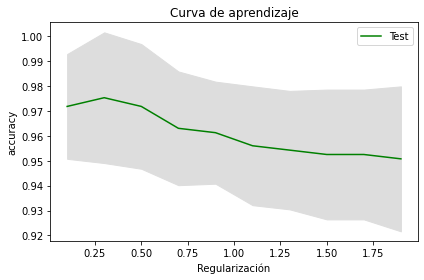

In [ ]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos obsevar un comportamiento bastante estable para este parámetro en el rango observado. 

El mejor valor (mayor accuraccy) es con $\alpha=0.3$

## Métricas detalladas por clase

Cuando las clases están descompensadas, el valor de exactitud (accuracy) obtenido por el clasificador puede no ser demasiado representativo de su funcionamiento. En estos casos conviene calcular los valores de precisión (precision), exahustividad (recall) y la medida F1 (F1 score) para cada una de las clases, además de los valores agregados.

Empezamos calculando los valores agregados haciendo una media ponderada de los valores de cada clase según el número de instancias de cada clase.

In [ ]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, breast['data_scaled'], breast['target'], scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([1.8551271 , 2.68313479, 1.28878903, 1.39680839, 1.57309294,
        1.37175488, 2.48723793, 3.97934699, 1.51875639, 1.29999995]),
 'score_time': array([0.01336789, 0.00546932, 0.00515127, 0.00515485, 0.00530171,
        0.02102685, 0.01161218, 0.01178455, 0.00523496, 0.00541162]),
 'test_precision_weighted': array([1.        , 0.92982456, 0.9829303 , 0.96491228, 1.        ,
        0.9829303 , 0.93074792, 1.        , 1.        , 0.96428571]),
 'test_recall_weighted': array([1.        , 0.92982456, 0.98245614, 0.96491228, 1.        ,
        0.98245614, 0.92982456, 1.        , 1.        , 0.96428571]),
 'test_f1_weighted': array([1.        , 0.92982456, 0.98236235, 0.96491228, 1.        ,
        0.98236235, 0.92901849, 1.        , 1.        , 0.96428571])}

In [ ]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.9755631076268194
Exhaustividad ponderada media:  0.9753759398496241
F1 ponderado media:  0.9752765757097794


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, breast['data_scaled'], breast['target'], cv=10)

# Informe por clases
cr = classification_report(breast['target'], predictions, target_names=breast['target_names'])
print(cr)

              precision    recall  f1-score   support

   malignant       0.98      0.96      0.97       212
      benign       0.98      0.99      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.97      0.97       569
weighted avg       0.98      0.98      0.98       569

